In [1]:
import pandas as pd
import numpy as np
from astropy.time import Time
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

SAVE_PATH = './tmp/saved_raw/'


In [3]:
# Load the raw astep data from "data/astep/raw/TIC382200986-01_20220824_ASTEP-ANTARCTICA_R_measurements.csv", also TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements, TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements, and TIC382200986-32_20210819_ASTEP-ANTARCTICA_Rc_measurements
df1 = pd.read_csv('../../data/astep/raw/TIC382200986-01_20220824_ASTEP-ANTARCTICA_R_measurements.csv')
df2 = pd.read_csv('../../data/astep/raw/TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements.csv')
df3 = pd.read_csv('../../data/astep/raw/TIC382200986-01_20230528_ASTEP-ANTARCTICA_R_measurements.csv')
df4 = pd.read_csv('../../data/astep/raw/TIC382200986-32_20210819_ASTEP-ANTARCTICA_Rc_measurements.csv')

# Keep only the first 3 columns, and rename them to time, flux, flux_err
df1 = df1.iloc[:, :3]
df2 = df2.iloc[:, :3]
df3 = df3.iloc[:, :3]
df4 = df4.iloc[:, :3]
df1.columns = ['time', 'flux', 'flux_err']
df2.columns = ['time', 'flux', 'flux_err']
df3.columns = ['time', 'flux', 'flux_err']
df4.columns = ['time', 'flux', 'flux_err']

# For df1 and 4, add 2450000.0 to the first column, and for 2 and 3, add 2460000.0
df1['time'] = df1['time'].apply(lambda x: x + 2450000.0)
df2['time'] = df2['time'].apply(lambda x: x + 2460000.0)
df3['time'] = df3['time'].apply(lambda x: x + 2460000.0)
df4['time'] = df4['time'].apply(lambda x: x + 2450000.0)

# Remove 2458000.0 from the first column
df1['time'] = df1['time'].apply(lambda x: x - 2458000.0)
df2['time'] = df2['time'].apply(lambda x: x - 2458000.0)
df3['time'] = df3['time'].apply(lambda x: x - 2458000.0)
df4['time'] = df4['time'].apply(lambda x: x - 2458000.0)

# Round the first column to 5 decimal places
df1['time'] = df1['time'].apply(lambda x: round(x, 5))
df2['time'] = df2['time'].apply(lambda x: round(x, 5))
df3['time'] = df3['time'].apply(lambda x: round(x, 5))
df4['time'] = df4['time'].apply(lambda x: round(x, 5))

# Convert to scientific notation
# df1 = convert_to_scientific_notation(df1)
# df2 = convert_to_scientific_notation(df2)
# df3 = convert_to_scientific_notation(df3)
# df4 = convert_to_scientific_notation(df4)

# Save the dataframes as csv files
#df1.to_csv('../data/astep/allesfitter_converted_2458/TIC382200986-01_20220824_ASTEP-ANTARCTICA_R_measurements.csv', index=False)
#df2.to_csv('../data/astep/allesfitter_converted_2458/TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements.csv', index=False)
#df3.to_csv('../data/astep/allesfitter_converted_2458/TIC382200986-01_20230528_ASTEP-ANTARCTICA_R_measurements.csv', index=False)
#df4.to_csv('../data/astep/allesfitter_converted_2458/TIC382200986-32_20210819_ASTEP-ANTARCTICA_Rc_measurements.csv', index=False)

# Comment the first line of each of the above 4 files with #
#for filename in ['TIC382200986-01_20220824_ASTEP-ANTARCTICA_R_measurements.csv', 'TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements.csv', 'TIC382200986-01_20230528_ASTEP-ANTARCTICA_R_measurements.csv', 'TIC382200986-32_20210819_ASTEP-ANTARCTICA_Rc_measurements.csv']:
#    with open('../data/astep/allesfitter_converted_2458/' + filename, 'r') as f:
#        lines = f.readlines()
#    lines[0] = '#' + lines[0]
#    with open('../data/astep/allesfitter_converted_2458/' + filename, 'w') as f:
#        f.writelines(lines)
        


In [6]:

def plot_dataframes(dataframes, x_plots, y_plots, titles, main_title, x_label, y_label, save_path=None, round_val=1):
    fig, axs = plt.subplots(x_plots, y_plots, figsize=(15, 15))
    axs = axs.ravel()  # flatten the array for easy iteration

    for i, df in enumerate(dataframes):
        axs[i].plot(df['time'], df['flux'], 'k.', markersize=5)
        axs[i].errorbar(df['time'], df['flux'], yerr=df['flux_err'], fmt='none', ecolor='k', elinewidth=0.2, capsize=0)
        axs[i].set_xlabel(x_label)
        axs[i].set_ylabel(y_label)
        axs[i].set_title(titles[i])
        axs[i].get_xaxis().get_major_formatter().set_useOffset(False)  # prevent x-axis from using offset
        axs[i].get_xaxis().get_major_formatter().set_scientific(False)  # prevent x-axis from using scientific notation
        axs[i].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.{round_val}f}'))  # round x-axis values
        axs[i].tick_params(axis='x', labelrotation=45)

    plt.tight_layout()
    plt.subplots_adjust(top=0.90, hspace=0.3, wspace=0.3)  # adjust top margin to 0.9
    plt.suptitle(main_title, y=0.98, fontsize=20)  # adjust fontsize to 20

    if save_path is not None:
        plt.savefig(save_path)

    plt.show()

In [7]:
# For each dataframe, convert to full BJD by adding 2458000.0
df1['time'] = df1['time'].apply(lambda x: x + 2458000.0)
df2['time'] = df2['time'].apply(lambda x: x + 2458000.0)
df3['time'] = df3['time'].apply(lambda x: x + 2458000.0)
df4['time'] = df4['time'].apply(lambda x: x + 2458000.0)



In [16]:
# Save the dataframes as csv files in directory transit_windows/space/astep/
# df1.to_csv("./transit_windows/space/astep/astep_lc_1.csv", index=False)
# df2.to_csv("./transit_windows/space/astep/astep_lc_2.csv", index=False)
# df3.to_csv("./transit_windows/space/astep/astep_lc_3.csv", index=False)
# df4.to_csv("./transit_windows/space/astep/astep_lc_4.csv", index=False)

def save_dataframes(directory, dataframes, format="csv", basename="astep"):
    """
    Saves a list of dataframes to the specified directory with the given format.

    Parameters:
    - directory: The directory path where files will be saved.
    - dataframes: A list of pandas DataFrames to be saved.
    - format: The format for saving the files. Options are "csv" for comma-separated,
              "space" for space-separated, and "tab" for tab-separated values.
    """
    # Ensure the directory string ends with a slash if not empty
    if directory and not directory.endswith('/'):
        directory += '/'

    # Determine separator and file extension based on the chosen format
    if format == "space":
        sep = " "
        extension = ""
    elif format == "tab":
        sep = "\t"
        extension = ""
    else:  # Default to CSV
        sep = ","
        extension = ".csv"

    # Save each dataframe in the specified format
    for i, df in enumerate(dataframes, start=1):
        file_path = f"{directory}{basename}_lc_{i}{extension}"
        df.to_csv(file_path, sep=sep, index=False)

# Example usage
dataframes = [df1, df2, df3, df4]  # List of your dataframes
directory = "./transit_windows/space/astep"
# save_dataframes(directory, dataframes, format="csv")  # For CSV
save_dataframes(directory, dataframes, format="space")  # For space-separated values
# save_dataframes(directory, dataframes, format="tab")  # For tab-separated values

In [11]:
# Load chat+omes
dfb1 = pd.read_csv('../../data/wine/allesfitter_converted_2458/LC_CHAT_20191110_TIC382200986.01-i_mags.csv')
dfb2 = pd.read_csv('../../data/wine/allesfitter_converted_2458/LC_OMES_20211119_TIC382200986.01-r_norm_flux.csv')
dfb3 = pd.read_csv('../../data/wine/allesfitter_converted_2458/LC_OMES_20221124_TIC382200986.01-i_norm_flux.csv')
dfb4 = pd.read_csv('../../data/wine/allesfitter_converted_2458/LC_OMES1_20231129_TIC382200986.01-r.csv')

# Rename headers to time, flux, flux_err
dfb1.columns = ['time', 'flux', 'flux_err']
dfb2.columns = ['time', 'flux', 'flux_err']
dfb3.columns = ['time', 'flux', 'flux_err']
dfb4.columns = ['time', 'flux', 'flux_err']

# print the first 5 rows of each dataframe
print(dfb1.head())



        time      flux  flux_err
0  798.62790  0.994528  0.000845
1  798.62958  0.999253  0.000841
2  798.63126  0.999898  0.000843
3  798.63298  0.998856  0.000843
4  798.63489  0.998900  0.000843


In [12]:
# For each dataframe, convert to full BJD by adding 2458000.0
dfb1['time'] = dfb1['time'].apply(lambda x: x + 2458000.0)
dfb2['time'] = dfb2['time'].apply(lambda x: x + 2458000.0)
dfb3['time'] = dfb3['time'].apply(lambda x: x + 2458000.0)
dfb4['time'] = dfb4['time'].apply(lambda x: x + 2458000.0)


In [17]:
# Save the dataframes as csv files in directory transit_windows/space/chat_omes/ using save_dataframes
dataframes = [dfb1, dfb2, dfb3, dfb4]  # List of your dataframes
directory = "./transit_windows/space/chat_omes"
save_dataframes(directory, dataframes, format="space", basename="chat_omes")  # For space-separated values



: 

In [ ]:
# # Plot the dataframes
# dataframes = [dfb1, dfb2, dfb3, dfb4]
# x_plots = 2
# y_plots = 2
# titles = ['CHAT', 'OMES', 'OMES', 'OMES1']
# main_title = 'Chat+omes'
# x_label = 'Time (BJD)'
# y_label = 'Flux'
# save_path = None
# round_val = 1
# plot_dataframes(dataframes, x_plots, y_plots, titles, main_title, x_label, y_label, save_path, round_val)

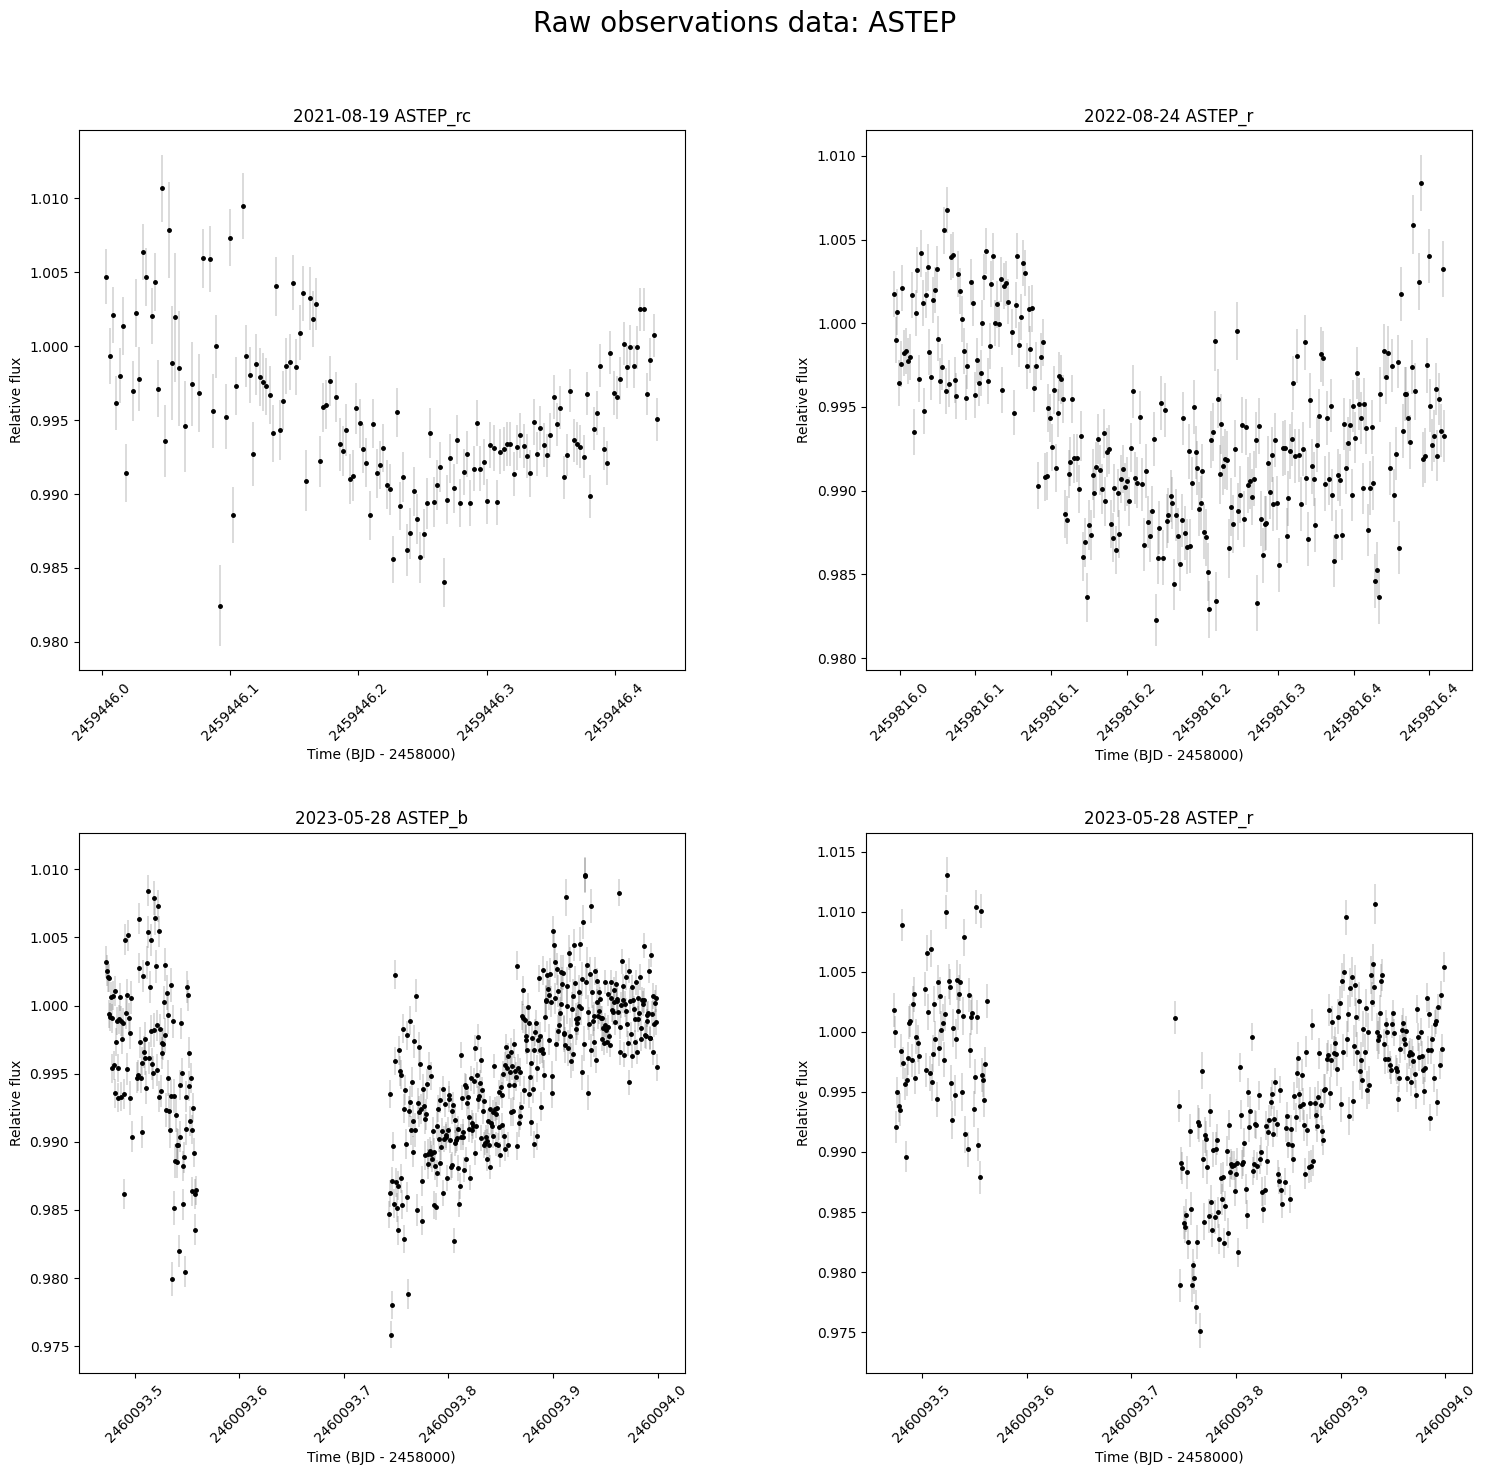

In [8]:
# plot_dataframes([df4, df1, df2, df3], 2, 2,
#                 ['2021-08-19 ASTEP_rc', '2022-08-24 ASTEP_r', '2023-05-28 ASTEP_b', '2023-05-28 ASTEP_r'],
#                 'Raw observations data: ASTEP', 'Time (BJD - 2458000)', 'Relative flux',
#                 './plots/astep_raw_data.png')
plot_dataframes([df4, df1, df2, df3], 2, 2,
                ['2021-08-19 ASTEP_rc', '2022-08-24 ASTEP_r', '2023-05-28 ASTEP_b', '2023-05-28 ASTEP_r'],
                'Raw observations data: ASTEP', 'Time (BJD - 2458000)', 'Relative flux',
                None, 1)

In [27]:
# Load chat+omes
dfb1 = pd.read_csv('../data/wine/allesfitter_converted_2458/LC_CHAT_20191110_TIC382200986.01-i_mags.csv')
dfb2 = pd.read_csv('../data/wine/allesfitter_converted_2458/LC_OMES_20211119_TIC382200986.01-r_norm_flux.csv')
dfb3 = pd.read_csv('../data/wine/allesfitter_converted_2458/LC_OMES_20221124_TIC382200986.01-i_norm_flux.csv')
dfb4 = pd.read_csv('../data/wine/allesfitter_converted_2458/LC_OMES1_20231129_TIC382200986.01-r.csv')

# Rename headers to time, flux, flux_err
dfb1.columns = ['time', 'flux', 'flux_err']
dfb2.columns = ['time', 'flux', 'flux_err']
dfb3.columns = ['time', 'flux', 'flux_err']
dfb4.columns = ['time', 'flux', 'flux_err']

# print the first 5 rows of each dataframe
print(dfb1.head())



        time      flux  flux_err
0  798.62790  0.994528  0.000845
1  798.62958  0.999253  0.000841
2  798.63126  0.999898  0.000843
3  798.63298  0.998856  0.000843
4  798.63489  0.998900  0.000843


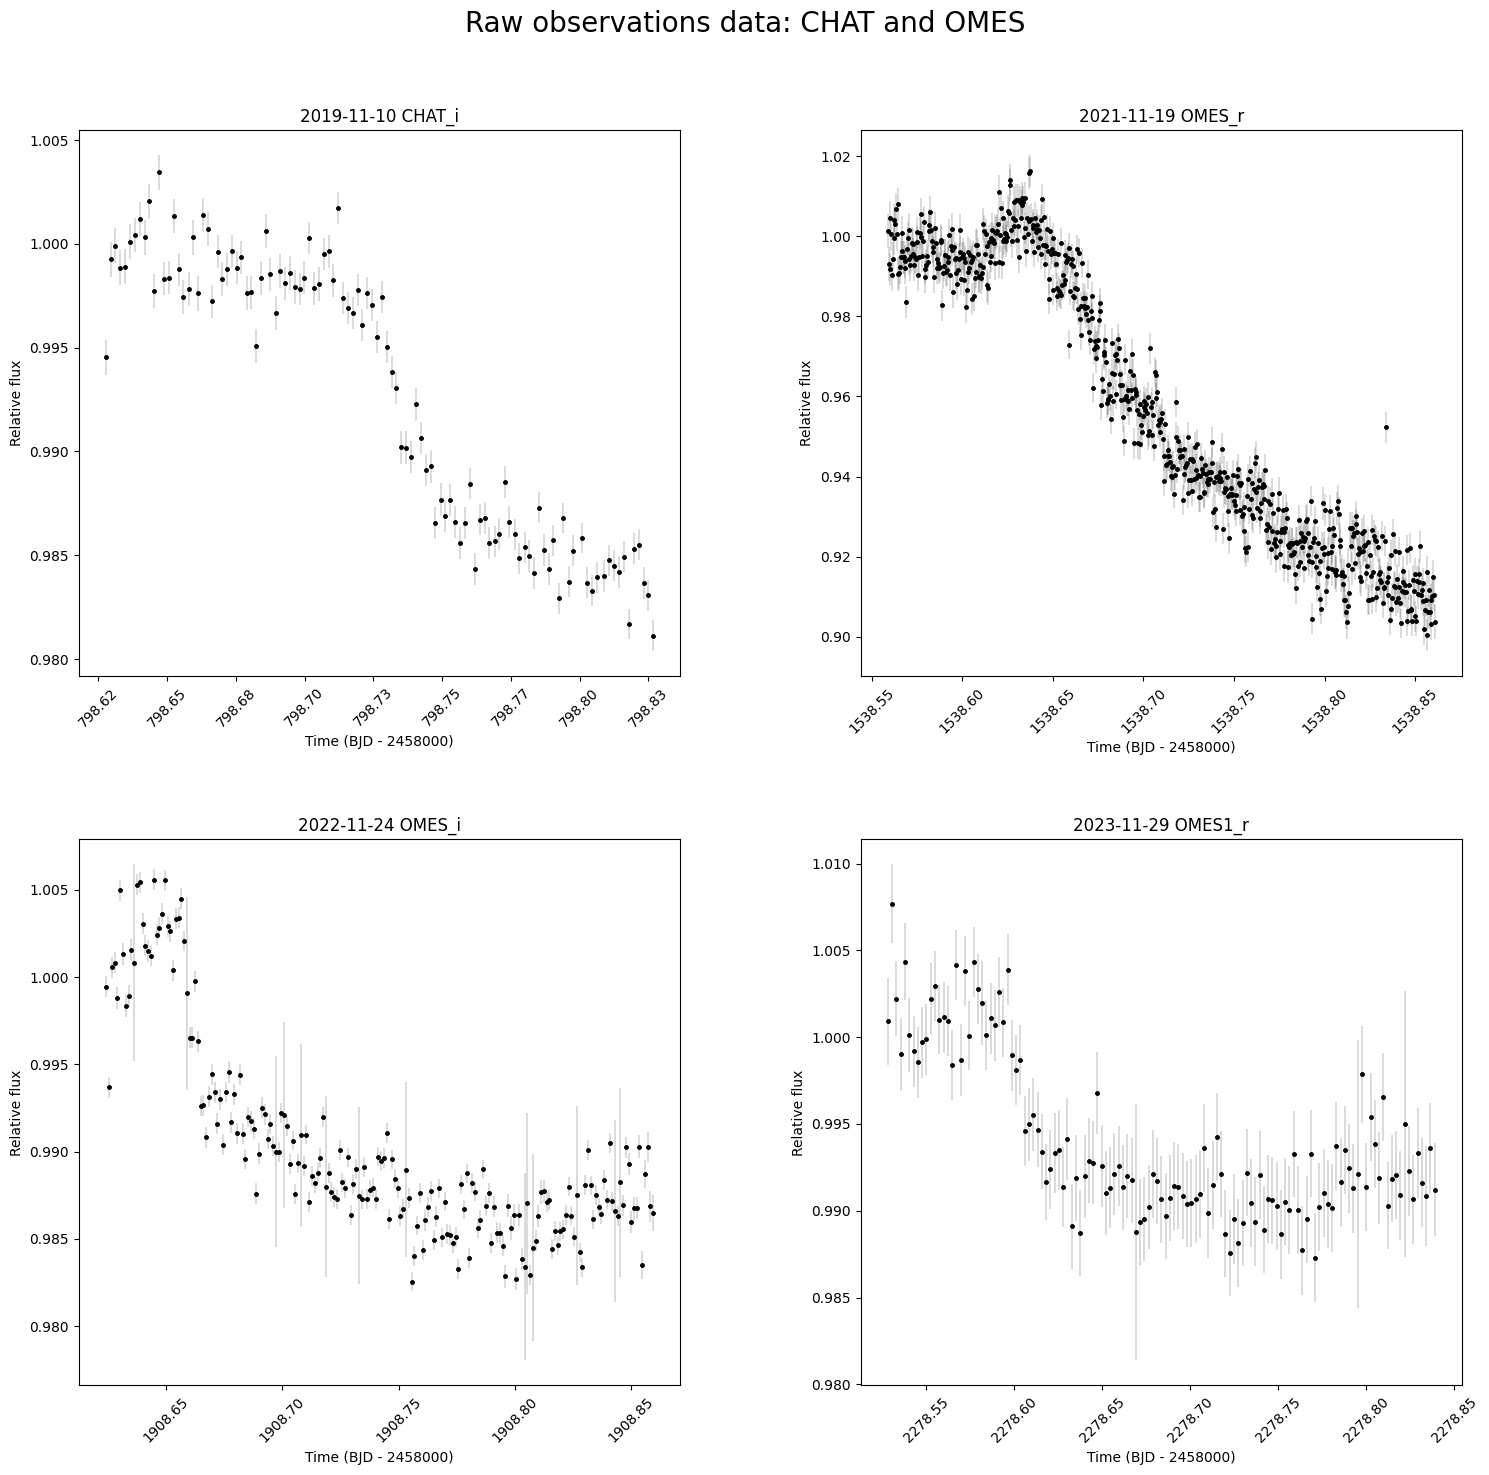

: 

In [28]:
plot_dataframes([dfb1, dfb2, dfb3, dfb4], 2, 2,
                ['2019-11-10 CHAT_i', '2021-11-19 OMES_r', '2022-11-24 OMES_i', '2023-11-29 OMES1_r'],
                'Raw observations data: CHAT and OMES', 'Time (BJD - 2458000)', 'Relative flux',
                SAVE_PATH + 'chat_omes_raw_data3.png',
                round_val=2)


In [11]:
# Load the TESS data
dfc1 = pd.read_csv('../data/tess-stitched/allesfitter_converted_2458/4409-tess-lightcurves-1800s.csv')
dfc2 = pd.read_csv('../data/tess-stitched/allesfitter_converted_2458/4409-tess-lightcurves-600s.csv')
dfc3 = pd.read_csv('../data/tess-stitched/allesfitter_converted_2458/4409-tess-lightcurves-180s.csv')

# Rename headers to time, flux, flux_err
dfc1.columns = ['time', 'flux', 'flux_err']
dfc2.columns = ['time', 'flux', 'flux_err']
dfc3.columns = ['time', 'flux', 'flux_err']

# head
print(dfc1.head())

        time      flux  flux_err
0  335.42716  1.000000  0.000693
1  335.44799  0.999506  0.000693
2  335.46882  0.998679  0.000692
3  335.48966  0.999402  0.000692
4  335.51049  1.001409  0.000692
